In [1]:
import numpy as np
from skimage import io, filters, img_as_ubyte
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import napari

from particle.pipeline import SandHeap

# 1. 加载数据

In [2]:
sandHeap = SandHeap(source="./data/liutao/source1000-1500.npy",
                   se=ndi.generate_binary_structure(rank=3, connectivity=2), 
                   connectivity=1,
                   persistencePath='./data/liutao/',
                   cubeSize=64)
print(sandHeap.data.shape, sandHeap.data.dtype, sandHeap.status)

Function `_loadData` runs for 0h 0min 0.5s
(500, 1766, 1766) uint8 data-loaded


Now plotting the histogram...
data-loaded


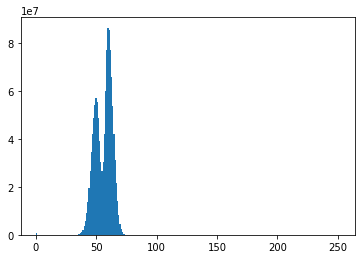

In [3]:
_ = sandHeap.drawHistogram()
print(sandHeap.status)

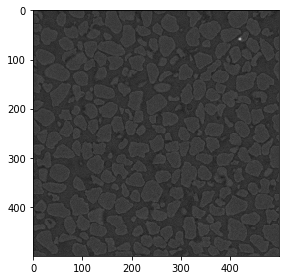

In [4]:
io.imshow(sandHeap.data[250][500:1000, 500:1000])

# 2. 直方图均衡

Now plotting the histogram...
Function `equalizeHist` runs for 0h 0min 55.4s


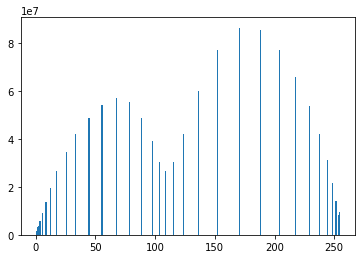

In [5]:
sandHeap.equalizeHist(draw=True)

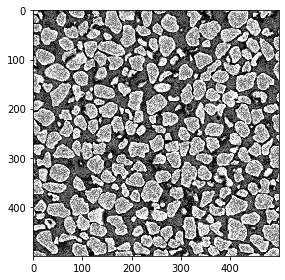

In [6]:
io.imshow(sandHeap.data[250][500:1000, 500:1000])

In [7]:
print(sandHeap.data.shape, sandHeap.data.dtype)

(500, 1766, 1766) uint8


# 3. 中值滤波

In [8]:
sandHeap.filter(method="median")

Function `filter` runs for 0h 7min 0.7s


Now plotting the histogram...


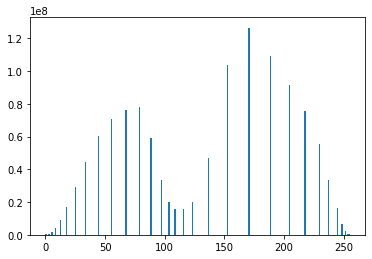

In [9]:
_ = sandHeap.drawHistogram()

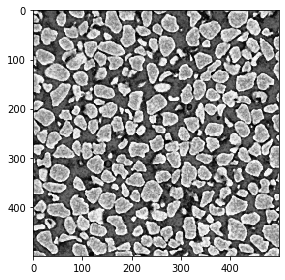

In [10]:
io.imshow(sandHeap.data[250][500:1000, 500:1000])

# 4. 二值化分割

In [11]:
grayThrd = filters.threshold_multiotsu(sandHeap.data[sandHeap.circleMask], classes=2, nbins=255)
grayThrd

array([123])

Function `binarySegmentation` runs for 0h 0min 4.3s


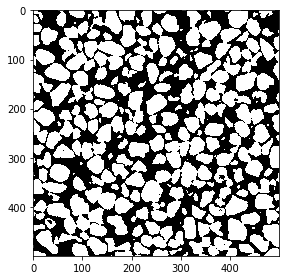

In [12]:
sandHeap.binarySegmentation(threshold=108)
io.imshow(img_as_ubyte(sandHeap.data[250][500:1000, 500:1000]))

# 5. 开运算

Function `binaryOpening` runs for 0h 0min 40.9s


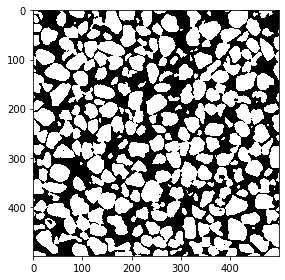

In [13]:
sandHeap.binaryOpening()
io.imshow(img_as_ubyte(sandHeap.data[250][500:1000, 500:1000]))

# 6. 孔洞填充

Function `binaryFillHoles` runs for 0h 1min 28.0s


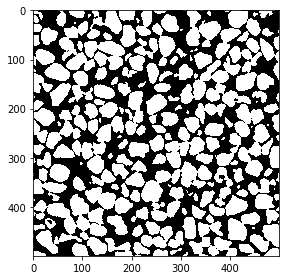

In [14]:
sandHeap.binaryFillHoles()
io.imshow(img_as_ubyte(sandHeap.data[250][500:1000, 500:1000]))

In [15]:
np.save('./data/liutao/binary.npy', sandHeap.data)

In [16]:
%gui qt
napari.view_image(sandHeap.data)

# 7. 分水岭分割

## 7.1. 距离变换

Function `_distanceForWatershed` runs for 0h 6min 39.7s


/opt/miniconda3/envs/PyTorch/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


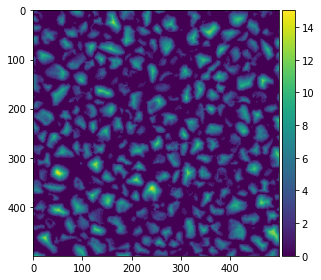

In [20]:
sandHeap._distanceForWatershed(pinch=False, persistence=True)
io.imshow(sandHeap._distance[250][500:1000, 500:1000])

## 7.2. 获取种子点

Function `_markersForWatershed` runs for 0h 1min 37.9s


/opt/miniconda3/envs/PyTorch/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


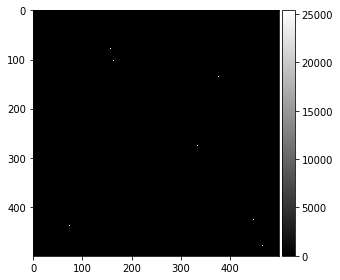

In [21]:
sandHeap._markersForWatershed(min_distance=7, persistence=True)
io.imshow(sandHeap._markers[250][500:1000, 500:1000], cmap="gray")

## 7.3. 分割

In [ ]:
sandHeap.watershedSegmentation(min_distance=7, persistence=True)
io.imshow(img_as_ubyte(sandHeap.preSegmented[250][500:1000, 500:1000]))

In [ ]:
sandHeap._distance = sandHeap._distance.astype(np.float32)

# 8. 分割优化 

In [ ]:
_ = sandHeap.removeBigSegmentationFace('3d', threshold=500, connectivity=2, persistence=True, returnDiagram=True)

In [ ]:
io.imshow(img_as_ubyte(sandHeap.finalSegmented[250][500:1000, 500:1000]))